In [45]:
import json

with open('Secrets.json') as f:
    data = json.load(f)
    
    connstring = data['connstring']
print(f"My secret key is {len(connstring)} characters in length.")


My secret key is 61 characters in length.


In [46]:
import pymongo
import certifi

client = pymongo.MongoClient(connstring, tlsCAFile=certifi.where())
mydb = client["DA_320"]

mycol = mydb.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {mycol}")


Using MongoDB version 5.0.14.
This database has the collections ['IMDB', 'Metacritic_Movie']


In [47]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = mydb["IMDB"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,63782e3fed3f19bde22991e1,77631,Grease,110,7.2,265183,TV-14::(D),6/13/1978,6000000,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,63782e3fed3f19bde22991e2,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,63782e3fed3f19bde22991e3,77416,The Deer Hunter,183,8.1,334827,R,12/8/1978,15000000,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,63782e3fed3f19bde22991e4,77651,Halloween,91,7.7,267109,TV-14,10/25/1978,300000,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,63782e3fed3f19bde22991e5,77975,National Lampoon's Animal House,109,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [48]:
# Transform and standardize the columns
imdb.release_date = pd.to_datetime(imdb.release_date, errors='coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime = pd.to_numeric(imdb.runtime, errors='coerce')


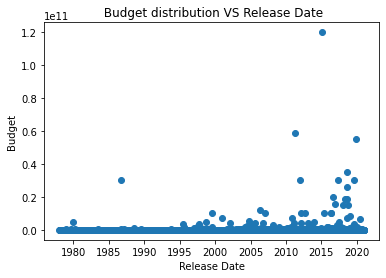

In [49]:
import matplotlib.pyplot as plt

plt.title(' Budget distribution VS Release Date')
plt.xlabel('Release Date')
plt.ylabel('Budget')
plt.scatter(imdb['release_date'], imdb['budget'])
plt.show()



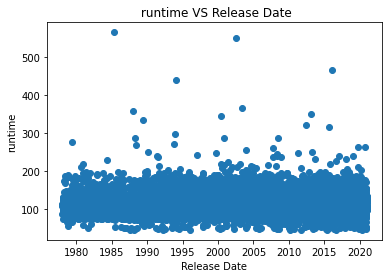

In [51]:
plt.title(' runtime VS Release Date')
plt.xlabel('Release Date')
plt.ylabel('runtime')
plt.scatter(imdb['release_date'], imdb['runtime'])
plt.show()